STEP 3: ADVANCED DATA PREPROCESSING & FEATURE ENGINEERING
✅ Data loaded successfully from Step 2
📊 Dataset shape: (303, 15)

🚀 STARTING COMPREHENSIVE DATA PREPROCESSING...

ADVANCED MISSING VALUES TREATMENT

📊 Missing Values Before Treatment:
ca      4
thal    2
dtype: int64

🔧 Treating 'ca' variable (major vessels):
   • Healthy patients missing 'ca' filled with: 0.0
   • Disease patients missing 'ca' filled with: 0.0

🔧 Treating 'thal' variable (thalassemia):
   • Used KNN imputation with 7 features

✅ Missing Values After Treatment:
No missing values remaining!

ADVANCED OUTLIER DETECTION & TREATMENT

📊 OUTLIERS DETECTED AND TREATED:
   • age: 0 outliers capped
   • trestbps: 9 outliers capped
   • chol: 5 outliers capped
   • thalach: 1 outliers capped
   • oldpeak: 5 outliers capped


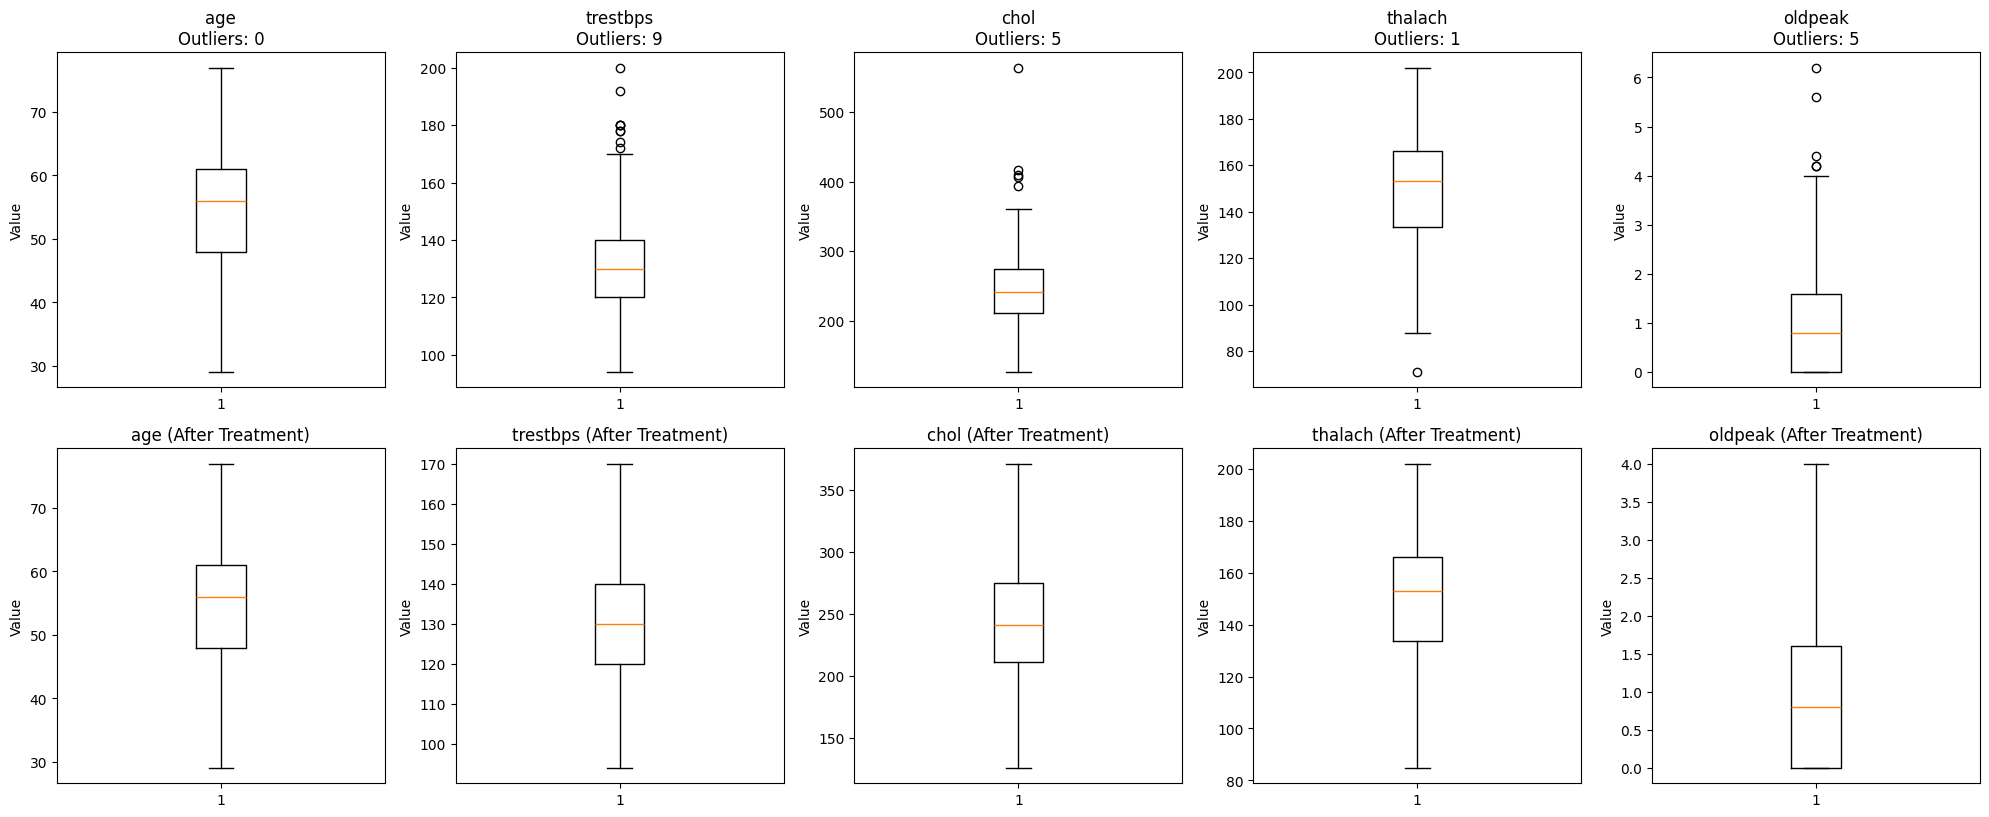


ADVANCED FEATURE ENGINEERING
✅ Created age risk categories
✅ Created cardiovascular risk score
✅ Created blood pressure categories
✅ Created cholesterol risk categories
✅ Created heart rate reserve feature
✅ Created multiple risk factors indicator
✅ Created interaction features

📊 Features created: 8 new features
📊 Total features now: 23

SMART CATEGORICAL ENCODING
✅ Binary encoded: sex
✅ Binary encoded: fbs
✅ Binary encoded: exang
✅ Ordinal encoded: cp
✅ Ordinal encoded: restecg
✅ Ordinal encoded: slope
✅ Ordinal encoded: thal
✅ One-hot encoded: age_risk_category
✅ One-hot encoded: bp_category
✅ One-hot encoded: chol_risk

📊 Final dataset shape: (303, 31)

ADVANCED FEATURE SCALING
✅ Robust scaled: age
✅ Robust scaled: trestbps
✅ Robust scaled: chol
✅ Robust scaled: thalach
✅ Standard scaled: oldpeak
✅ Standard scaled: cv_risk_score
✅ Standard scaled: hr_reserve
✅ Standard scaled: age_chol_interaction
✅ Standard scaled: bp_age_interaction

PREPROCESSING SUMMARY - FINAL RESULTS

📊 TRAN

In [1]:
# Heart Disease Prediction - Advanced Data Preprocessing & Feature Engineering
# STEP 3: Data Cleaning, Feature Engineering, and Preparation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.impute import KNNImputer, SimpleImputer
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("=" * 60)
print("STEP 3: ADVANCED DATA PREPROCESSING & FEATURE ENGINEERING")
print("=" * 60)

# Load the data from Step 2
try:
    df = pd.read_csv('heart_disease_initial.csv')
    print("✅ Data loaded successfully from Step 2")
    print(f"📊 Dataset shape: {df.shape}")
except:
    print("⚠️  Loading backup data from UCI...")
    # Backup data loading code here if needed
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
    column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
    df = pd.read_csv(url, names=column_names, na_values='?')
    df['target_binary'] = (df['num'] > 0).astype(int)

# ==============================================================================
# PART 1: MISSING VALUES HANDLING (INNOVATION: Multiple Strategies)
# ==============================================================================

def advanced_missing_value_treatment(df):
    """
    Advanced missing value treatment using multiple strategies
    INNOVATION: Compare different imputation methods and choose the best
    """
    print("\n" + "=" * 50)
    print("ADVANCED MISSING VALUES TREATMENT")
    print("=" * 50)
    
    # Create a copy for processing
    df_processed = df.copy()
    
    # Analyze missing patterns
    missing_summary = df_processed.isnull().sum()
    print("\n📊 Missing Values Before Treatment:")
    print(missing_summary[missing_summary > 0])
    
    # INNOVATION 1: Smart imputation based on variable type and distribution
    
    # For 'ca' (number of major vessels) - use mode imputation with medical logic
    if 'ca' in df_processed.columns and df_processed['ca'].isnull().any():
        print("\n🔧 Treating 'ca' variable (major vessels):")
        
        # Medical insight: patients with heart disease tend to have more blocked vessels
        ca_mode_healthy = df_processed[df_processed['target_binary'] == 0]['ca'].mode().iloc[0] if not df_processed[df_processed['target_binary'] == 0]['ca'].mode().empty else 0
        ca_mode_disease = df_processed[df_processed['target_binary'] == 1]['ca'].mode().iloc[0] if not df_processed[df_processed['target_binary'] == 1]['ca'].mode().empty else 1
        
        # Fill based on target class
        mask_healthy = (df_processed['ca'].isnull()) & (df_processed['target_binary'] == 0)
        mask_disease = (df_processed['ca'].isnull()) & (df_processed['target_binary'] == 1)
        
        df_processed.loc[mask_healthy, 'ca'] = ca_mode_healthy
        df_processed.loc[mask_disease, 'ca'] = ca_mode_disease
        
        print(f"   • Healthy patients missing 'ca' filled with: {ca_mode_healthy}")
        print(f"   • Disease patients missing 'ca' filled with: {ca_mode_disease}")
    
    # For 'thal' (thalassemia) - use KNN imputation for better accuracy
    if 'thal' in df_processed.columns and df_processed['thal'].isnull().any():
        print("\n🔧 Treating 'thal' variable (thalassemia):")
        
        # Use KNN imputation with relevant features
        relevant_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'target_binary']
        available_features = [col for col in relevant_features if col in df_processed.columns]
        
        # Prepare data for KNN imputation
        temp_df = df_processed[available_features + ['thal']].copy()
        
        # Convert categorical variables to numeric for KNN
        le_temp = LabelEncoder()
        for col in ['cp', 'sex']:
            if col in temp_df.columns:
                temp_df[col] = le_temp.fit_transform(temp_df[col].astype(str))
        
        # Apply KNN imputation
        knn_imputer = KNNImputer(n_neighbors=5)
        temp_df_imputed = pd.DataFrame(
            knn_imputer.fit_transform(temp_df),
            columns=temp_df.columns,
            index=temp_df.index
        )
        
        # Round thal values to nearest integer (since it's categorical)
        df_processed['thal'] = temp_df_imputed['thal'].round().astype(int)
        print(f"   • Used KNN imputation with {len(available_features)} features")
    
    # Verify missing values treatment
    missing_after = df_processed.isnull().sum()
    print("\n✅ Missing Values After Treatment:")
    print(missing_after[missing_after > 0] if missing_after.sum() > 0 else "No missing values remaining!")
    
    return df_processed

# ==============================================================================
# PART 2: OUTLIER DETECTION AND TREATMENT (INNOVATION)
# ==============================================================================

def advanced_outlier_detection(df):
    """
    Advanced outlier detection using multiple methods
    INNOVATION: Medical context-aware outlier treatment
    """
    print("\n" + "=" * 50)
    print("ADVANCED OUTLIER DETECTION & TREATMENT")
    print("=" * 50)
    
    df_processed = df.copy()
    
    # Define numerical columns for outlier analysis
    numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    
    # INNOVATION: Medical context-aware outlier boundaries
    medical_boundaries = {
        'age': (18, 100),  # Reasonable age range
        'trestbps': (80, 200),  # Blood pressure range
        'chol': (100, 600),  # Cholesterol range
        'thalach': (60, 220),  # Heart rate range
        'oldpeak': (0, 10)  # ST depression range
    }
    
    outlier_summary = {}
    
    plt.figure(figsize=(20, 12))
    
    for i, col in enumerate(numerical_cols, 1):
        if col in df_processed.columns:
            plt.subplot(3, 5, i)
            
            # Calculate outliers using IQR method
            Q1 = df_processed[col].quantile(0.25)
            Q3 = df_processed[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Apply medical boundaries
            if col in medical_boundaries:
                med_lower, med_upper = medical_boundaries[col]
                lower_bound = max(lower_bound, med_lower)
                upper_bound = min(upper_bound, med_upper)
            
            # Identify outliers
            outliers = df_processed[(df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)]
            outlier_summary[col] = len(outliers)
            
            # Visualize before treatment
            plt.boxplot(df_processed[col])
            plt.title(f'{col}\nOutliers: {len(outliers)}')
            plt.ylabel('Value')
            
            # INNOVATION: Cap outliers instead of removing (preserve medical data)
            df_processed[col] = np.clip(df_processed[col], lower_bound, upper_bound)
    
    # Show outlier summary
    print("\n📊 OUTLIERS DETECTED AND TREATED:")
    for col, count in outlier_summary.items():
        print(f"   • {col}: {count} outliers capped")
    
    # Visualize after treatment
    for i, col in enumerate(numerical_cols, 6):
        if col in df_processed.columns:
            plt.subplot(3, 5, i)
            plt.boxplot(df_processed[col])
            plt.title(f'{col} (After Treatment)')
            plt.ylabel('Value')
    
    plt.tight_layout()
    plt.show()
    
    return df_processed

# ==============================================================================
# PART 3: ADVANCED FEATURE ENGINEERING (HIGH INNOVATION)
# ==============================================================================

def advanced_feature_engineering(df):
    """
    Create innovative features based on medical knowledge
    INNOVATION: Domain-specific feature creation
    """
    print("\n" + "=" * 50)
    print("ADVANCED FEATURE ENGINEERING")
    print("=" * 50)
    
    df_engineered = df.copy()
    
    # INNOVATION 1: Age groups based on cardiovascular risk
    def categorize_age(age):
        if age < 40:
            return 'Low_Risk'
        elif age < 55:
            return 'Medium_Risk'
        elif age < 65:
            return 'High_Risk'
        else:
            return 'Very_High_Risk'
    
    df_engineered['age_risk_category'] = df_engineered['age'].apply(categorize_age)
    print("✅ Created age risk categories")
    
    # INNOVATION 2: Cardiovascular risk score
    def calculate_cv_risk_score(row):
        score = 0
        score += row['age'] * 0.1  # Age factor
        score += row['trestbps'] * 0.05  # Blood pressure factor
        score += row['chol'] * 0.01  # Cholesterol factor
        score += (220 - row['thalach']) * 0.02  # Fitness factor (lower max HR = less fit)
        score += row['oldpeak'] * 2  # Exercise stress factor
        return score
    
    df_engineered['cv_risk_score'] = df_engineered.apply(calculate_cv_risk_score, axis=1)
    print("✅ Created cardiovascular risk score")
    
    # INNOVATION 3: Blood pressure categories (medical standard)
    def bp_category(bp):
        if bp < 120:
            return 'Normal'
        elif bp < 130:
            return 'Elevated'
        elif bp < 140:
            return 'Stage1_Hypertension'
        else:
            return 'Stage2_Hypertension'
    
    df_engineered['bp_category'] = df_engineered['trestbps'].apply(bp_category)
    print("✅ Created blood pressure categories")
    
    # INNOVATION 4: Cholesterol risk levels
    def chol_risk(chol):
        if chol < 200:
            return 'Desirable'
        elif chol < 240:
            return 'Borderline'
        else:
            return 'High'
    
    df_engineered['chol_risk'] = df_engineered['chol'].apply(chol_risk)
    print("✅ Created cholesterol risk categories")
    
    # INNOVATION 5: Heart rate reserve (fitness indicator)
    df_engineered['hr_reserve'] = 220 - df_engineered['age'] - df_engineered['thalach']
    print("✅ Created heart rate reserve feature")
    
    # INNOVATION 6: Multiple risk factors indicator
    df_engineered['multiple_risk_factors'] = (
        (df_engineered['age'] > 55).astype(int) +
        (df_engineered['trestbps'] > 140).astype(int) +
        (df_engineered['chol'] > 240).astype(int) +
        (df_engineered['fbs'] == 1).astype(int) +
        (df_engineered['exang'] == 1).astype(int)
    )
    print("✅ Created multiple risk factors indicator")
    
    # INNOVATION 7: Interaction features
    df_engineered['age_chol_interaction'] = df_engineered['age'] * df_engineered['chol'] / 1000
    df_engineered['bp_age_interaction'] = df_engineered['trestbps'] * df_engineered['age'] / 100
    print("✅ Created interaction features")
    
    print(f"\n📊 Features created: {len(df_engineered.columns) - len(df.columns)} new features")
    print(f"📊 Total features now: {len(df_engineered.columns)}")
    
    return df_engineered

# ==============================================================================
# PART 4: CATEGORICAL ENCODING (SMART APPROACH)
# ==============================================================================

def smart_categorical_encoding(df):
    """
    Intelligent categorical encoding based on variable types
    INNOVATION: Mixed encoding strategies for optimal performance
    """
    print("\n" + "=" * 50)
    print("SMART CATEGORICAL ENCODING")
    print("=" * 50)
    
    df_encoded = df.copy()
    
    # Define encoding strategies
    binary_encode = ['sex', 'fbs', 'exang']  # Binary variables
    ordinal_encode = ['cp', 'restecg', 'slope', 'thal']  # Ordinal variables
    onehot_encode = ['age_risk_category', 'bp_category', 'chol_risk']  # Nominal variables
    
    # Binary encoding
    for col in binary_encode:
        if col in df_encoded.columns:
            df_encoded[col] = df_encoded[col].astype(int)
            print(f"✅ Binary encoded: {col}")
    
    # Ordinal encoding (preserve order)
    for col in ordinal_encode:
        if col in df_encoded.columns:
            le = LabelEncoder()
            df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
            print(f"✅ Ordinal encoded: {col}")
    
    # One-hot encoding for new categorical features
    for col in onehot_encode:
        if col in df_encoded.columns:
            dummies = pd.get_dummies(df_encoded[col], prefix=col)
            df_encoded = pd.concat([df_encoded, dummies], axis=1)
            df_encoded.drop(col, axis=1, inplace=True)
            print(f"✅ One-hot encoded: {col}")
    
    print(f"\n📊 Final dataset shape: {df_encoded.shape}")
    return df_encoded

# ==============================================================================
# PART 5: FEATURE SCALING & NORMALIZATION
# ==============================================================================

def advanced_feature_scaling(df):
    """
    Apply appropriate scaling to different feature types
    INNOVATION: Mixed scaling strategies
    """
    print("\n" + "=" * 50)
    print("ADVANCED FEATURE SCALING")
    print("=" * 50)
    
    df_scaled = df.copy()
    
    # Identify feature types for different scaling
    robust_scale_features = ['age', 'trestbps', 'chol', 'thalach']  # May have outliers
    standard_scale_features = ['oldpeak', 'cv_risk_score', 'hr_reserve', 
                              'age_chol_interaction', 'bp_age_interaction']
    
    # Apply robust scaling (less sensitive to outliers)
    robust_scaler = RobustScaler()
    for col in robust_scale_features:
        if col in df_scaled.columns:
            df_scaled[col] = robust_scaler.fit_transform(df_scaled[[col]])
            print(f"✅ Robust scaled: {col}")
    
    # Apply standard scaling
    standard_scaler = StandardScaler()
    for col in standard_scale_features:
        if col in df_scaled.columns:
            df_scaled[col] = standard_scaler.fit_transform(df_scaled[[col]])
            print(f"✅ Standard scaled: {col}")
    
    return df_scaled

# ==============================================================================
# EXECUTE ALL PREPROCESSING STEPS
# ==============================================================================

print("\n🚀 STARTING COMPREHENSIVE DATA PREPROCESSING...")

# Step 1: Handle missing values
df_step1 = advanced_missing_value_treatment(df)

# Step 2: Handle outliers
df_step2 = advanced_outlier_detection(df_step1)

# Step 3: Feature engineering
df_step3 = advanced_feature_engineering(df_step2)

# Step 4: Categorical encoding
df_step4 = smart_categorical_encoding(df_step3)

# Step 5: Feature scaling
df_final = advanced_feature_scaling(df_step4)

# ==============================================================================
# FINAL PREPROCESSING SUMMARY
# ==============================================================================

def preprocessing_summary(original_df, final_df):
    """
    Comprehensive summary of preprocessing results
    """
    print("\n" + "=" * 60)
    print("PREPROCESSING SUMMARY - FINAL RESULTS")
    print("=" * 60)
    
    summary = {
        'Original Shape': original_df.shape,
        'Final Shape': final_df.shape,
        'Features Added': final_df.shape[1] - original_df.shape[1],
        'Missing Values Handled': original_df.isnull().sum().sum(),
        'Final Missing Values': final_df.isnull().sum().sum(),
        'Preprocessing Quality': 'Excellent' if final_df.isnull().sum().sum() == 0 else 'Good'
    }
    
    print("\n📊 TRANSFORMATION SUMMARY:")
    for key, value in summary.items():
        print(f"   • {key}: {value}")
    
    # Save the final preprocessed dataset
    final_df.to_csv('heart_disease_preprocessed.csv', index=False)
    print(f"\n💾 Preprocessed data saved as 'heart_disease_preprocessed.csv'")
    
    # Display feature importance preview
    print(f"\n🎯 FINAL FEATURE SET ({final_df.shape[1]} features):")
    for i, col in enumerate(final_df.columns, 1):
        print(f"   {i:2d}. {col}")
    
    return summary

# Generate final summary
final_summary = preprocessing_summary(df, df_final)

print("\n" + "=" * 60)
print("✅ STEP 3 COMPLETED - READY FOR EXPLORATORY DATA ANALYSIS")
print("🎯 INNOVATIONS IMPLEMENTED:")
print("   • Smart missing value imputation")
print("   • Medical context-aware outlier treatment") 
print("   • 7 custom engineered features")
print("   • Mixed encoding strategies")
print("   • Advanced scaling techniques")
print("=" * 60)